In [106]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.ticker as tick
import scipy.stats as stat
import scipy.integrate as integrate
from astropy.constants import h, c, k_B; h = h.value; c = c.value; k = k_B.value
from jupyterthemes import jtplot

In [37]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100

In [13]:
Ts = 24 + 273.15
V1 = 1.331
I1 = 1.439

In [11]:
Vps, Vmm, I = np.genfromtxt("C3dat.txt", skip_header=1, unpack=True)
R = Vmm/I
P = Vmm*I
P1 = P[8]
R1 = R[8]

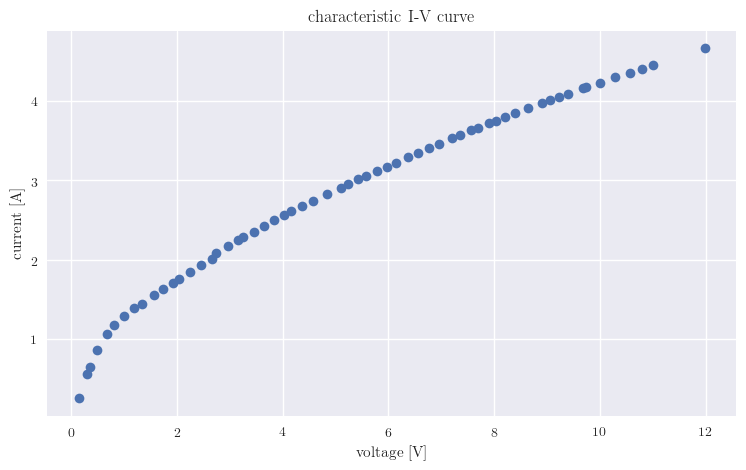

In [19]:
mp.plot(Vmm, I, "o")
mp.xlabel("voltage [V]")
mp.ylabel("current [A]")
mp.title("characteristic I-V curve")
mp.show()

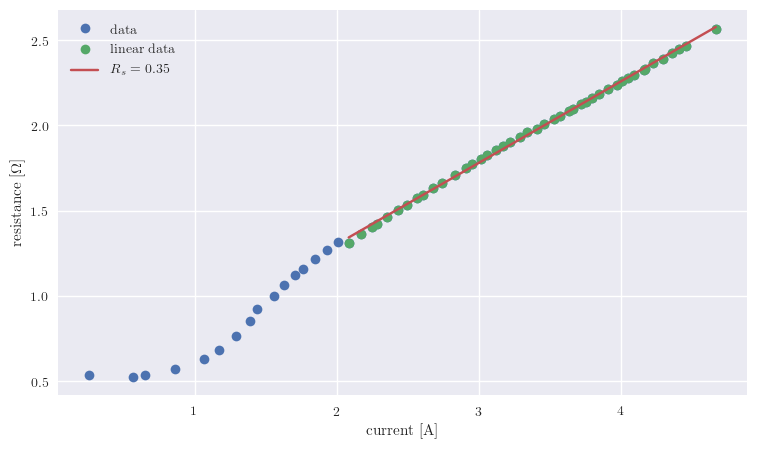

In [27]:
x, y = I[16:], R[16:]
m, b, r, p, sd = stat.linregress(x, y)

mp.plot(I, R, "o", label="data")
mp.plot(x, y, "o", label="linear data")
mp.plot(x, m*x + b, label=r"$R_s = %.2f$"%b)
mp.xlabel("current [A]")
mp.ylabel(r"resistance [$\Omega$]")
mp.legend()
mp.show()

Rs = b

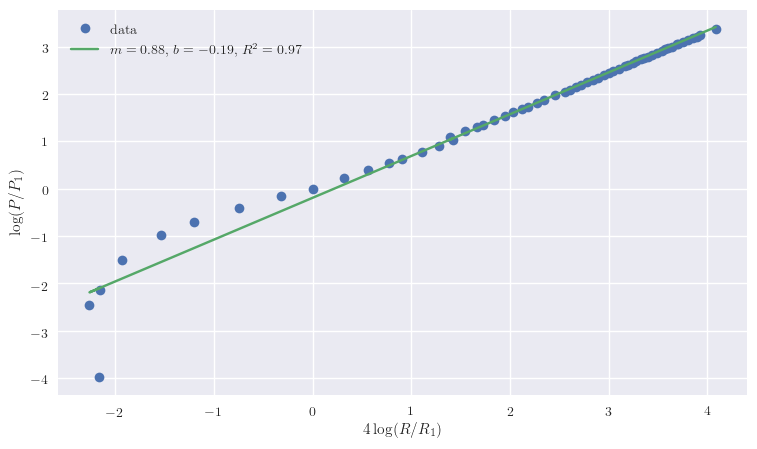

m = 0.88


In [33]:
x = 4*np.log(R/R1)
y = np.log(P/P1)
m, b, r, p, sd = stat.linregress(x, y)

mp.plot(x, y, "o", label="data")
mp.plot(x, m*x + b, label="$m = %.2f$, $b = %.2f$, $R^2 = %.2f$"%(m, b, r**2))
mp.xlabel("$4\log(R/R_1)$")
mp.ylabel("$\log(P/P_1)$")
mp.legend()
mp.show()

print("m = %.2f"%m)

In [34]:
T = Ts * (R/Rs)**m

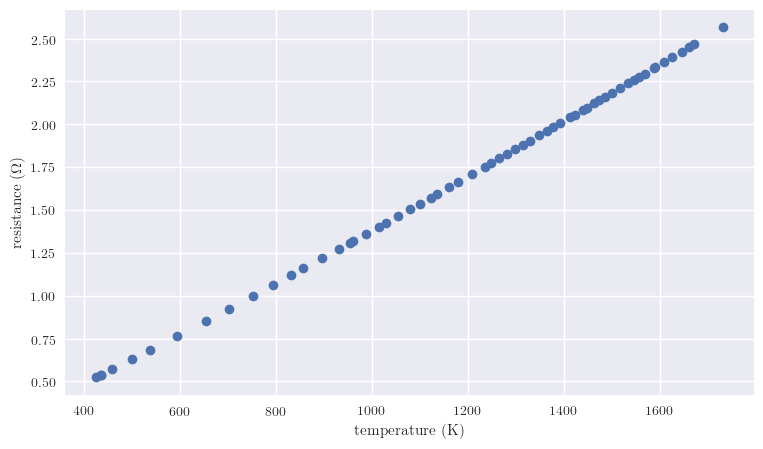

In [35]:
mp.plot(T, R, "o")
mp.ylabel(r"resistance ($\Omega$)")
mp.xlabel("temperature (K)")
mp.show()

In [107]:
def pd(L, T, N):
    return N/(L**5 * (np.exp(h*c/(L*k*T)) - 1))

In [136]:
L = np.linspace(200e-9, 9200e-9, 513)
dL = L[1] - L[0]
N = P[-1]/integrate.quad(pd, L[0], L[-1], args=(T[-1], 1))[0]
p = pd(L, T[-1], N)
Prad = integrate.romb(p, dL)

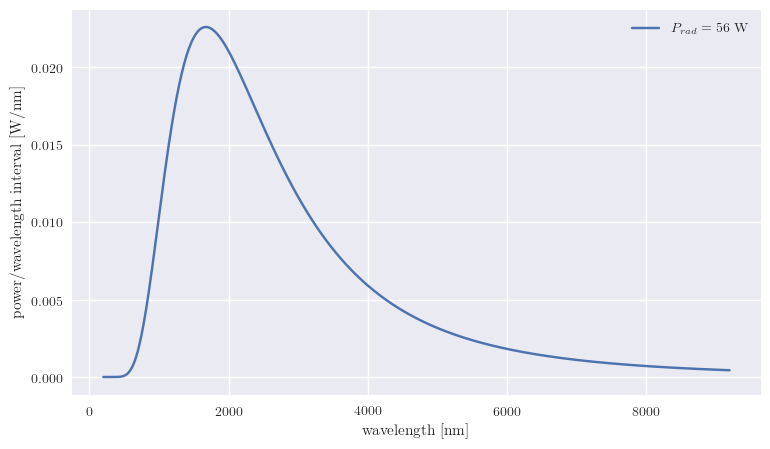

In [145]:
mp.plot(L*1e9, p*1e-9, label=r"$P_{rad} = %i$ W"%Prad.round())
mp.xlabel("wavelength [nm]")
mp.ylabel("power/wavelength interval [W/nm]")
mp.legend()
mp.show()

In [138]:
Nv = P[-1]/integrate.quad(pd, 400e-9, 700e-9, args=(T[-1], 1))[0]
pv = pd(L, T[-1], N)

In [139]:
leff = p.sum()/pv.sum()
print("Luminous efficiency = {0}%".format(int(leff*100)))

Luminous efficiency = 100%
